In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/dilka/Desktop/Python Dashboard/MTA_Key_Performance_Indicators__2008-2021 (1).csv")

# Preprocessing
df_cleaned = df.dropna(how='all')  # Remove fully empty rows
df_cleaned.columns = df_cleaned.columns.str.strip()  # Clean column names
df_cleaned = df_cleaned.dropna(axis=1, how='all')  # Drop empty columns

print("Columns after cleaning:")
print(df_cleaned.columns.tolist())


Columns after cleaning:
['Indicator Sequence', 'Parent Sequence', 'Agency Name', 'Indicator Name', 'Description', 'Category', 'Frequency', 'Desired Change', 'Indicator Unit', 'Decimal Places', 'Period Year', 'Period Month', 'YTD Target', 'YTD Actual', 'Monthly Target', 'Monthly Actual', 'Period']


In [3]:
# Summary statistics
summary = df_cleaned.describe(include='all')
print("Summary:")
print(summary)

# Missing value analysis
missing = df_cleaned.isnull().sum()
print("Missing values:")
print(missing[missing > 0])


Summary:
        Indicator Sequence  Parent Sequence  Agency Name  \
count         15991.000000     15991.000000        15991   
unique                 NaN              NaN            5   
top                    NaN              NaN  NYC Transit   
freq                   NaN              NaN         9272   
mean         292951.153461    222375.788944          NaN   
std          141536.681726    179129.758225          NaN   
min           20419.000000         0.000000          NaN   
25%          166787.000000     20421.000000          NaN   
50%          374913.000000    374903.000000          NaN   
75%          391700.000000    391690.000000          NaN   
max          392372.000000    392289.000000          NaN   

                                     Indicator Name  \
count                                         15991   
unique                                          129   
top     Employee Lost Time and Restricted Duty Rate   
freq                                            45

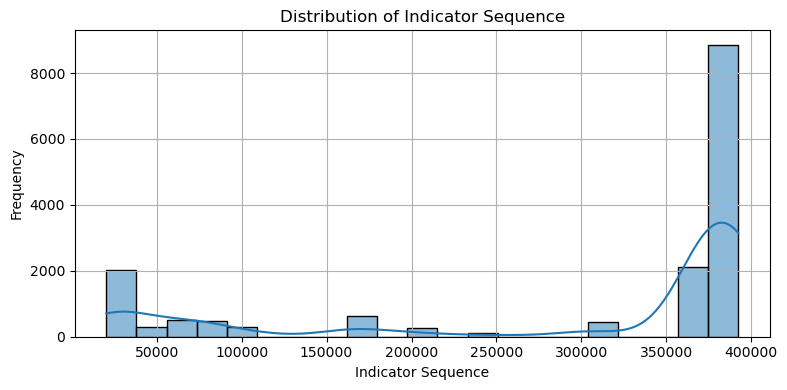

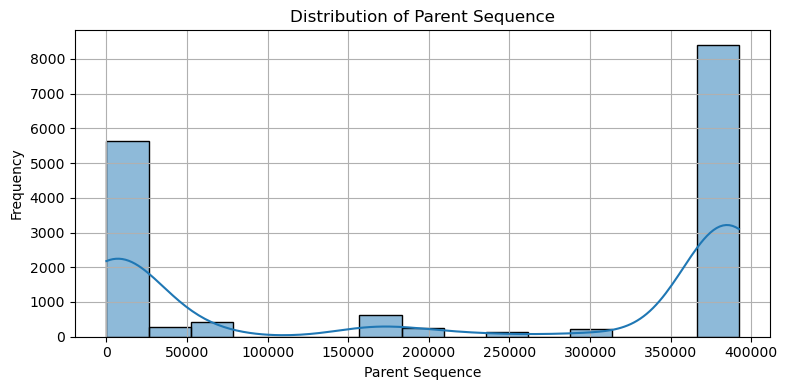

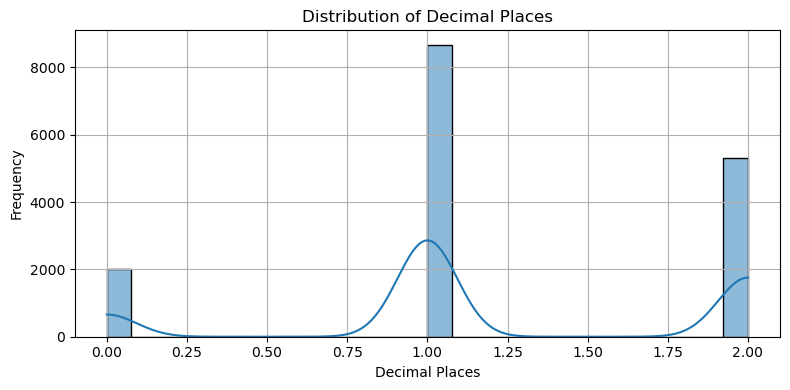

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose 3 numerical columns (you can change these as needed)
numeric_cols = df_cleaned.select_dtypes(include='number').columns[:3]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cleaned[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


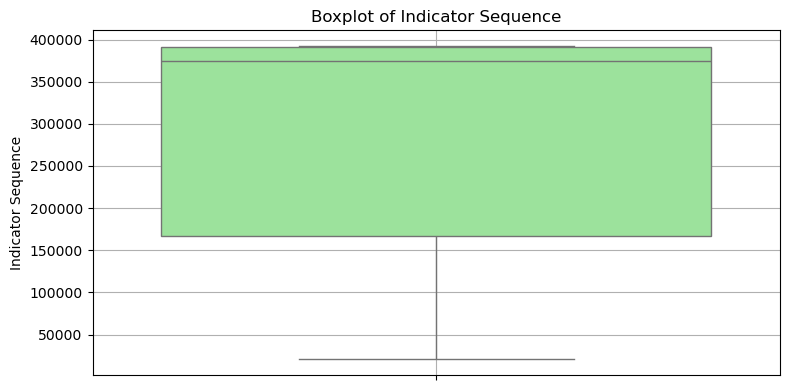

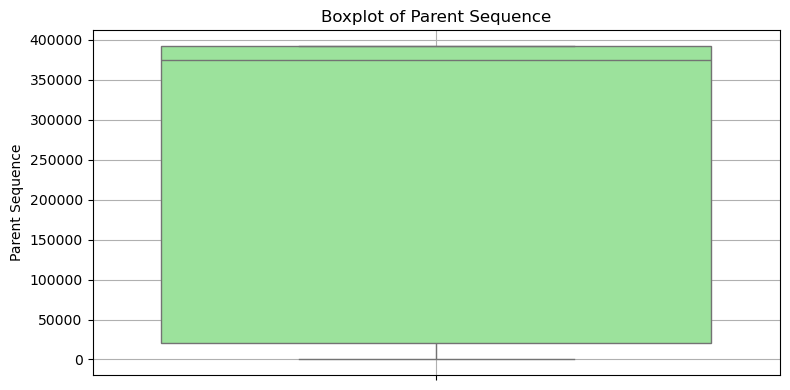

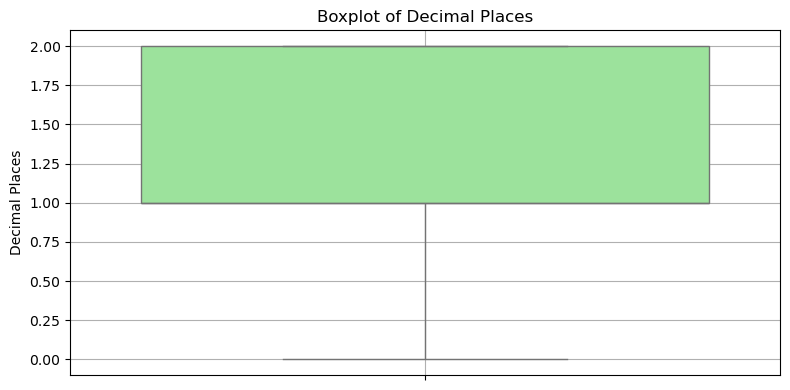

In [7]:
# Customized boxplots for same 3 numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df_cleaned[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


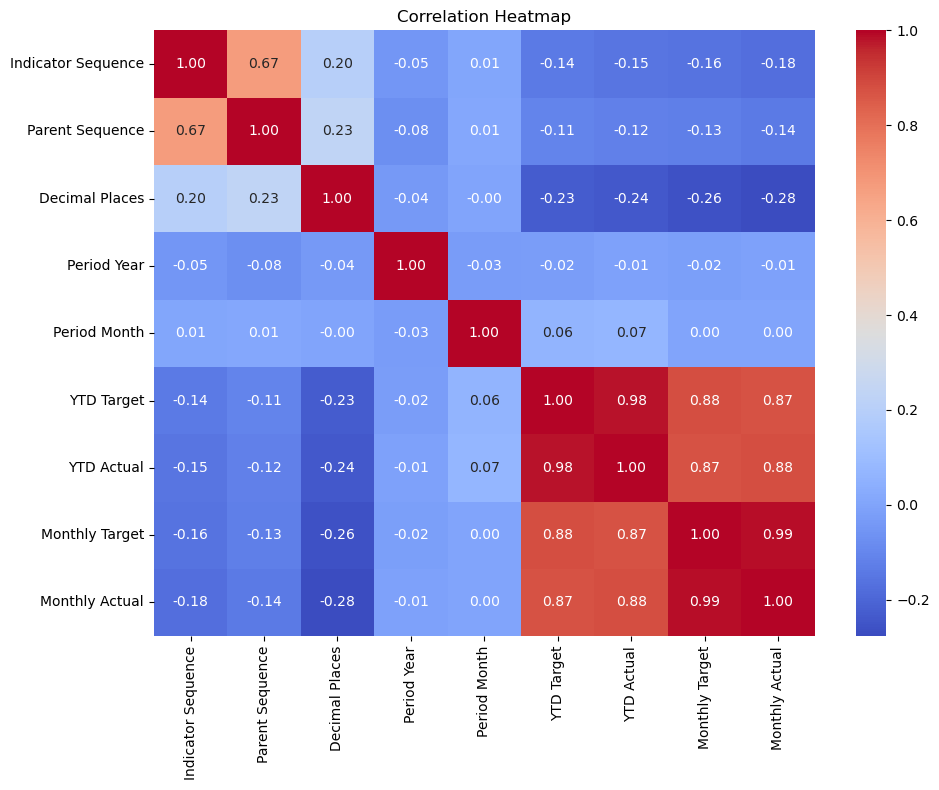

In [9]:
# Correlation heatmap
correlation_matrix = df_cleaned.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
